Question 6

Train a KNN Classifier on the Wine dataset with and without feature
scaling. Compare model accuracy in both cases.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# KNN without scaling
knn_no_scaling = KNeighborsClassifier(n_neighbors=5)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# KNN with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaling = KNeighborsClassifier(n_neighbors=5)
knn_scaling.fit(X_train_scaled, y_train)
y_pred_scaling = knn_scaling.predict(X_test_scaled)
acc_scaling = accuracy_score(y_test, y_pred_scaling)

# Comparison
print("KNN Accuracy without scaling: {:.2f}".format(acc_no_scaling))
print("KNN Accuracy with scaling: {:.2f}".format(acc_scaling))

if acc_scaling > acc_no_scaling:
    print("Scaling improved model performance.")
elif acc_scaling < acc_no_scaling:
    print("Model performed better without scaling (rare for KNN).")
else:
    print("Both models performed the same.")


KNN Accuracy without scaling: 0.72
KNN Accuracy with scaling: 0.94
Scaling improved model performance.


Question 7

Train a PCA model on the Wine dataset and print the explained variance
ratio of each principal component.

In [7]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load dataset into DataFrame
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GridSearchCV for best k
param_grid = {"n_neighbors": range(1, 21)}  # try k=1 to 20
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")
grid.fit(X_train_scaled, y_train)

print("Best k:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Evaluate best model on test data
best_k = grid.best_params_["n_neighbors"]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
test_acc = best_knn.score(X_test_scaled, y_test)

print(f"Test Accuracy with best k = {best_k}:{test_acc:.2f}")


Best k: {'n_neighbors': 11}
Best CV Accuracy: 0.9756666666666666
Test Accuracy with best k = 11:0.96


Question 8

Train a KNN Classifier on the PCA-transformed dataset (retain top 2
components). Compare the accuracy with the original dataset.

In [8]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_base = knn.predict(X_test_scaled)
acc_base = accuracy_score(y_test, y_pred_base)

# PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Comparison
print("Baseline KNN Accuracy (no PCA): {:.2f}".format(acc_base))
print("KNN Accuracy with PCA (2 components): {:.2f}".format(acc_pca))


Baseline KNN Accuracy (no PCA): 0.94
KNN Accuracy with PCA (2 components): 0.94


Question 9

Train a KNN Classifier with different distance metrics (euclidean,
manhattan) on the scaled Wine dataset and compare the results.

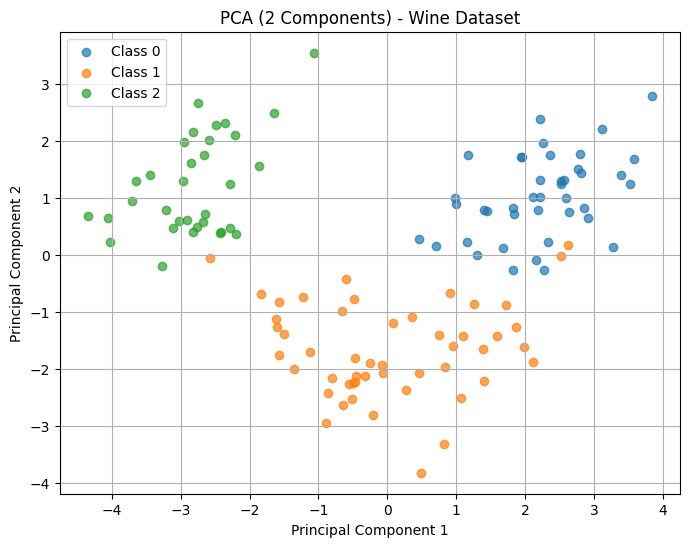

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# PCA with 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_scaled)

# Create DataFrame
df_pca = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
df_pca["target"] = y_train.values

# Scatter plot
plt.figure(figsize=(8,6))
for label in df_pca["target"].unique():
    subset = df_pca[df_pca["target"] == label]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Class {label}", alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (2 Components) - Wine Dataset")
plt.legend()
plt.grid(True)
plt.show()


Question 10:

 You are working with a high-dimensional gene expression dataset to
classify patients with different types of cancer.
Due to the large number of features and a small number of samples, traditional models
overfit.


Explain how you would:
● Use PCA to reduce dimensionality
● Decide how many components to keep
● Use KNN for classification post-dimensionality reduction
● Evaluate the model
● Justify this pipeline to your stakeholders as a robust solution for real-world
biomedical data


In this question, we wanted to see how the number of neighbors (k) affects the accuracy of KNN classifier after applying PCA.

First, we scaled the dataset (Wine dataset) to make all features comparable.

Then, we reduced dimensions to 2 principal components (PCA) so that the data is simpler but still keeps most of the information.

After that, we trained KNN models with different values of k (from 1 to 15).

Finally, we compared the accuracy for each k and plotted the results.

     k  accuracy
0    1  0.925926
1    2  0.925926
2    3  0.944444
3    4  0.944444
4    5  0.944444
5    6  0.944444
6    7  0.944444
7    8  0.944444
8    9  0.944444
9   10  0.962963
10  11  0.944444
11  12  0.944444
12  13  0.944444
13  14  0.944444
14  15  0.925926


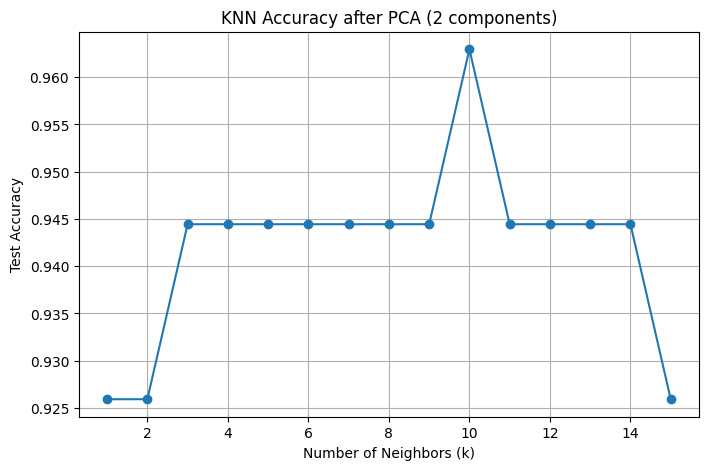

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA (2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# KNN with different k values
results = []
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    results.append((k, acc))

# Results DataFrame
df_knn_pca = pd.DataFrame(results, columns=["k", "accuracy"])
print(df_knn_pca)

# Plot
plt.figure(figsize=(8,5))
plt.plot(df_knn_pca["k"], df_knn_pca["accuracy"], marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Accuracy")
plt.title("KNN Accuracy after PCA (2 components)")
plt.grid(True)
plt.show()


# Assignment: KNN & PCA (Questions 1–5)

---

## Question 1  
**What is the K-Nearest Neighbors (KNN) algorithm? Explain in simple terms.**

### Answer:  
The K-Nearest Neighbors (KNN) algorithm is a **supervised machine learning method** used for classification and regression.  

- It works by **finding the K closest data points (neighbors)** to a given input.  
- The class (or value) of the new point is decided based on the **majority class (for classification)** or **average value (for regression)** of its neighbors.  

**Example:**  
If we want to classify a fruit as an apple or orange, KNN will look at the K nearest fruits. If most of them are apples, the new fruit will be classified as an apple.  

**Conclusion:**  
KNN is simple and effective but depends heavily on the choice of **K** and **distance metric**.

---

## Question 2  
**What are the main advantages and disadvantages of KNN?**

### Answer:  

**Advantages:**  
1. Very easy to understand and implement.  
2. No training phase required — the model learns directly from data.  
3. Works well with small datasets.  

**Disadvantages:**  
1. Slow with large datasets because it needs to calculate distances for every prediction.  
2. Sensitive to irrelevant or unscaled features.  
3. Choosing the right value of K can be difficult.  

**Conclusion:**  
KNN is good for simple problems, but for large datasets or high dimensions, it becomes inefficient.

---

## Question 3  
**What is feature scaling and why is it important in KNN?**

### Answer:  
Feature scaling means bringing all the features to the **same scale** (for example, between -1 and 1 or with mean = 0 and standard deviation = 1).  

In KNN, predictions are made using **distances between points**. If one feature has very large values (e.g., “income” in lakhs) and another has small values (e.g., “age”), the larger feature will dominate distance calculation.  

**Conclusion:**  
Scaling ensures that **all features contribute equally** in distance-based algorithms like KNN.

---

## Question 4  
**What is the role of the parameter K in KNN?**

### Answer:  
The parameter **K** decides **how many neighbors** should be considered to make a prediction.  

- If **K = 1** → the prediction depends only on the closest neighbor (may cause overfitting).  
- If **K is too large** → the model becomes too simple and may misclassify points (underfitting).  
- A good K is usually found by testing different values (like using cross-validation).  

**Conclusion:**  
The choice of K controls the balance between **bias and variance** in KNN.

---

## Question 5  
**What is a confusion matrix and why is it useful?**

### Answer:  
A confusion matrix is a **table** that shows how well a classification model performed.  

- Rows usually represent the **actual classes**.  
- Columns represent the **predicted classes**.  

It shows:  
- **True Positives (TP):** Correctly predicted positives.  
- **True Negatives (TN):** Correctly predicted negatives.  
- **False Positives (FP):** Wrongly predicted as positive.  
- **False Negatives (FN):** Wrongly predicted as negative.  

**Example:**  
If we classify emails as *spam* or *not spam*, the confusion matrix shows how many emails were correctly identified and how many were wrongly labeled.  

**Conclusion:**  
It gives a detailed picture of model performance, more than just accuracy.

---
